<a href="https://colab.research.google.com/github/moridin04/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence if a hate speech or not
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [403]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import nltk

In [404]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

## Training Set

Use this to train your model

In [405]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

In [406]:
df_train.head()

,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1


In [407]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


<ipython-input-408-841638e94905>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count = pd.value_counts(df_train["label"], sort= True)


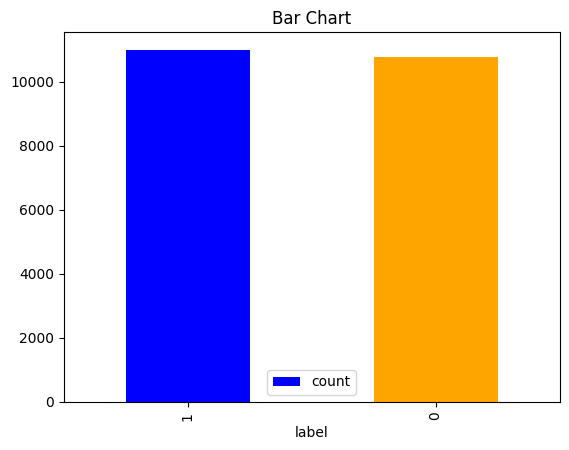

In [408]:
import matplotlib.pyplot as plt
count = pd.value_counts(df_train["label"], sort= True)
count.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar Chart')
plt.legend(loc='best')
plt.show()

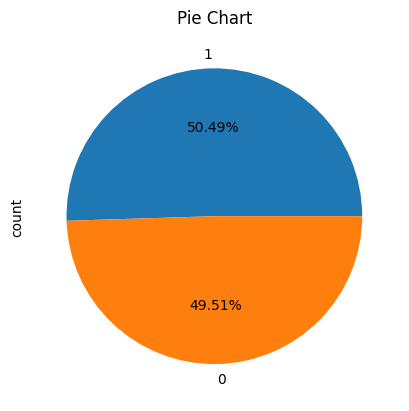

In [409]:
count.plot(kind = 'pie',autopct='%1.2f%%')
plt.title('Pie Chart')
plt.show()

In [410]:
from nltk.stem import PorterStemmer

my_file = open("stopwords-tl.txt", "r")
data = my_file.read()
stopwords = data.split("\n")
my_file.close()

def clean_text(text):
    # Removal of digits, special characters
    text = re.sub("[^A-Za-z]", " ", text)
    #Conversion to Lowercase
    text = text.lower()
    text = text.split()
    #Stemming
    stemmer = PorterStemmer()
    #Stopword Removal
    text = [stemmer.stem(word)
    for word in text if word not in set(stopwords)]
    text = " ".join(text)
    return text

In [411]:
text = df_train.text[0]
print(text)

Presidential candidate Mar Roxas implies that the govt should not be liable re: Laglag Bala. Laglag Bayag na ata ito


In [412]:
text = clean_text(text)
print(text)

presidenti candid mar roxa impli govt liabl re laglag bala laglag bayag ata


In [413]:
texts = []
for i in range(0, len(df_train)):
    text = clean_text(df_train.text[i])
    texts.append(text)

In [414]:
df_train = df_train.drop(["text"],axis=1)
df_train['text'] = texts
df_train.head()

,label,text
0,1,presidenti candid mar roxa impli govt liabl re...
1,1,parang mali sumunod patalasta nescaf coffe bla...
2,1,bet pula kulay posa
3,0,usernam kakampink
4,1,parang tahimik pink doc willi ong reaction paper


## Validation Set

Use this set to evaluate your model

In [415]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

In [416]:
df_validation.head()

,text,label
0,VinTee [USERNAME] [USERNAME] and [USERNAME] Ka...,1
1,binay's sidekicks were employees of makati cit...,1
2,This is expected as we use different methodol...,0
3,Ang tanga tanga talaga ni Nancy Binay eh. Tskkk.,1
4,Binay giving away bracelets after every selfie...,0


## Test Set

Use this set to test your model

In [417]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

In [418]:
df_test.head()

,text,label
0,Binay: Patuloy ang kahirapan dahil sa maling p...,0
1,SA GOBYERNONG TAPAT WELCOME SA BAGUO ANG LAHAT...,0
2,wait so ur telling me Let Leni Lead mo pero NY...,1
3,[USERNAME]wish this is just a nightmare that ...,0
4,doc willie ong and isko sabunutan po,0


In [419]:
x_train_text = df_train["text"].values
y_train = df_train["label"].values
x_eval_text = df_validation["text"].values
y_eval = df_validation["label"].values
x_test_text = df_test["text"].values
y_test = df_test["label"].values

print(x_train_text.shape, y_train.shape, x_eval_text.shape, y_eval.shape)

(21773,) (21773,) (2800,) (2800,)


In [420]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train_transformed = vectorizer.fit_transform(x_train_text)
x_test_transformed = vectorizer.transform(x_test_text)
x_eval_transformed = vectorizer.transform(x_eval_text)
print(x_train_transformed.shape, x_eval_transformed.shape)

(21773, 32604) (2800, 32604)


In [421]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(x_train_transformed, y_train)

y_pred_eval = nb.predict(x_eval_transformed)
y_pred_train = nb.predict(x_train_transformed)

In [422]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay

predictions = nb.predict(vectorizer.transform(x_eval_text))
predictions
accuracy = accuracy_score(y_eval, predictions)
balanced_accuracy = balanced_accuracy_score(y_eval, predictions)
precision = precision_score(y_eval, predictions)
recall = recall_score(y_eval, predictions)

print("Accuracy:",round(100*accuracy,2),'%')
print("Balanced accuracy:",round(100*balanced_accuracy,2),'%')
print("Precision:", round(100*precision,2),'%')
print("Recall:", round(100*recall,2),'%')

Accuracy: 80.57 %
Balanced accuracy: 80.5 %
Precision: 77.1 %
Recall: 87.56 %


In [423]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_eval, y_pred_eval)
cm

array([[1017,  368],
       [ 176, 1239]])

In [424]:
#0: non-hate speech // 1: hate speech
test = MultinomialNB()
test.fit(x_test_transformed, y_test)

new_text = pd.Series("[USERNAME]")
new_text_transform = vectorizer.transform(new_text)
test.predict(new_text_transform)

array([0])

In [425]:
predictions = nb.predict(vectorizer.transform(x_test_text))
predictions
accuracy = accuracy_score(y_test, predictions)
balanced_accuracy = balanced_accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print("Accuracy:",round(100*accuracy,2),'%')
print("Balanced accuracy:",round(100*balanced_accuracy,2),'%')
print("Precision:", round(100*precision,2),'%')
print("Recall:", round(100*recall,2),'%')

Accuracy: 80.85 %
Balanced accuracy: 80.89 %
Precision: 77.28 %
Recall: 87.12 %
